# Hyperparameter optimization - grid optimization method

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re, pip, conda

d:\CODE\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


- HyperParameter Optimization

hyperparameter optimization algorithms can be mainly divided into:

> Various types of searches based on grid (Grid)<br>
> Various optimization algorithms based on Bayesian optimization (Baysian)<br>
> Various types of optimization based on gradient (Gradient-based)<br>
> Various types of population-based optimization (evolutionary algorithms, genetic algorithms, etc.)

Among them, various grid search methods and Bayesian-based optimization methods are the most popular. Bayesian optimization methods can even be called the SOTA model in contemporary hyperparameter optimization. 

---

### RandomizedSearchCV

C:\Users\25420\AppData\Local\Temp\ipykernel_25940\1511204730.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(comb.iloc[:,0],comb.iloc[:,1],cmap="Blues")
C:\Users\25420\AppData\Local\Temp\ipykernel_25940\1511204730.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax2.scatter(comb.iloc[:,0],comb.iloc[:,1],cmap="Blues")
C:\Users\25420\AppData\Local\Temp\ipykernel_25940\1511204730.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax2.scatter([50,250,200,200,300,100,150,150],[4,2,6,3,2,3,2,5],cmap="red",s=20,linewidths=5)


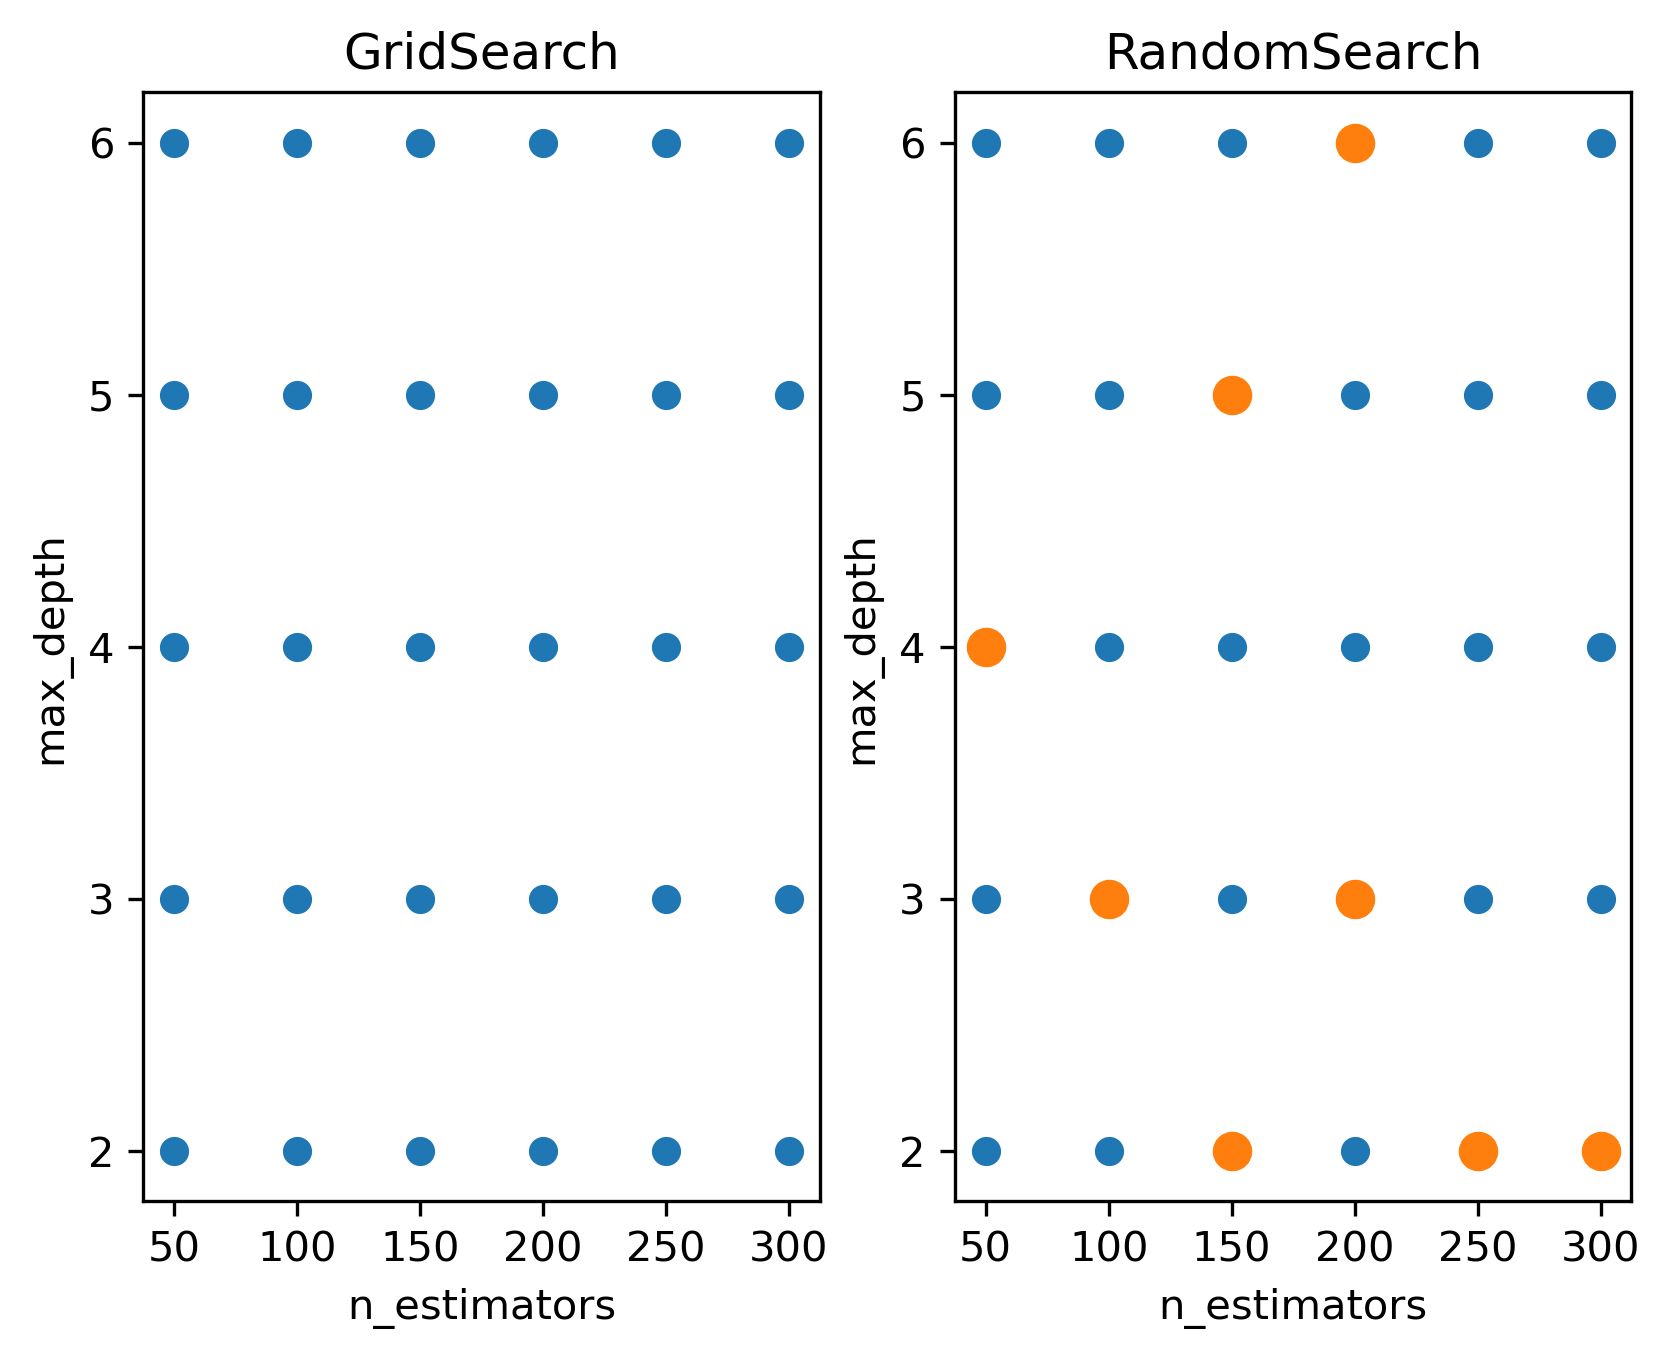

In [2]:
fig, [ax1, ax2] = plt.subplots(1,2,dpi=300)
n_e_list = [*range(50,350,50)]
m_d_list = [*range(2,7)]
comb = pd.DataFrame([(n_estimators, max_depth) for n_estimators in n_e_list for max_depth in m_d_list])

ax1.scatter(comb.iloc[:,0],comb.iloc[:,1],cmap="Blues")
ax1.set_xticks([*range(50,350,50)])
ax1.set_yticks([*range(2,7)])
ax1.set_xlabel("n_estimators")
ax1.set_ylabel("max_depth")
ax1.set_title("GridSearch")

ax2.scatter(comb.iloc[:,0],comb.iloc[:,1],cmap="Blues")
ax2.scatter([50,250,200,200,300,100,150,150],[4,2,6,3,2,3,2,5],cmap="red",s=20,linewidths=5)
ax2.set_xticks([*range(50,350,50)])
ax2.set_yticks([*range(2,7)])
ax2.set_xlabel("n_estimators")
ax2.set_ylabel("max_depth")
ax2.set_title("RandomSearch");

> When setting the same global space, the **operation speed** of random search is much faster than that of enumeration grid search. <br>

> When setting the same number of training times, random search can cover a much larger space than enumeration grid search. <br>

> Also, the neat thing is that the **minimum loss** from random grid search is very close to the **minimum loss** from enumeration grid search.

In [3]:
from sklearn.model_selection import RandomizedSearchCV

*class* `sklearn.model_selection.RandomizedSearchCV`(estimator, param_distributions, \*, n_iter=10, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', random_state=None, error_score=nan, return_train_score=False)

All parameters are interpreted as follows, among which the bolded parameters are unique to random grid search:

|Name|Description|
|:--:|:--:|
|estimator|parameter adjustment object, an estimator|
|param_distributions|Global parameter space, which can be a dictionary or a list of dictionaries|
|**n_iter**|The number of iterations. The more iterations, the larger the extracted sub-parameter space|
|scoring|Evaluation indicators, supports outputting multiple parameters at the same time|
|n_jobs|Set the number of threads involved in calculation when working|
|refit|Select evaluation metrics and optimal parameters and train on the complete data set|
|cv|Cross-validation fold|
|verbose|Output work log format|
|pre_dispatch|The number of task divisions during multi-task parallelization|
|**random_state**|Random number seed|
|error_score|When the grid search reports an error, the result is returned. When 'raise' is selected, the error will be reported directly and the training process will be interrupted. In other cases, a warning message will be displayed and the training will continue to be completed|
|return_train_score|Whether to display the parameter score in the training set during cross-validation|

In [4]:
data = pd.read_csv(r"D:\Practice\Machine Learning\datasets\House Price\train_encode.csv",index_col=0)

In [5]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [6]:
X.shape

(1460, 80)

In [7]:
X.head()

,Id,住宅类型,住宅区域,街道接触面积(英尺),住宅面积,街道路面状况,巷子路面状况,住宅形状(大概),住宅现状,水电气,...,半开放式门廊面积,泳池面积,泳池质量,篱笆质量,其他配置,其他配置的价值,销售月份,销售年份,销售类型,销售状态
0,0.0,5.0,3.0,36.0,327.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,8.0,4.0
1,1.0,0.0,3.0,51.0,498.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,8.0,4.0
2,2.0,5.0,3.0,39.0,702.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2.0,8.0,4.0
3,3.0,6.0,3.0,31.0,489.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0
4,4.0,5.0,3.0,55.0,925.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,8.0,4.0


In [8]:
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import cross_validate, KFold, GridSearchCV

In [10]:
param_grid_simple = {"criterion": ["squared_error","poisson"]
                     , 'n_estimators': [*range(20,100,5)]
                     , 'max_depth': [*range(10,25,2)]
                     , "max_features": ["log2","sqrt",16,32,64,"auto"]
                     , "min_impurity_decrease": [*np.arange(0,5,10)]
                    }

reg = RFR(random_state=21, verbose=True, n_jobs=10)
cv = KFold(n_splits=5, shuffle=True, random_state=21)

In [12]:
def count_space(param):
    no_option = 1
    for i in param_grid_simple:
        no_option *= len(param_grid_simple[i])
    print(no_option)

In [13]:
count_space(param_grid_simple)

1536


In [14]:
search = RandomizedSearchCV(estimator=reg
                            ,param_distributions=param_grid_simple
                            ,n_iter = 800 #子空间的大小是全域空间的一半左右
                            ,scoring = "neg_mean_squared_error"
                            ,verbose = True
                            ,cv = cv
                            ,random_state=21
                            ,n_jobs=8
                           )

In [16]:
start = time.time()
search.fit(X, y)
print(time.time() - start)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


d:\CODE\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
705 fits failed out of a total of 4000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "d:\CODE\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\CODE\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "d:\CODE\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "d:\CODE\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
 

354.6165225505829


[Parallel(n_jobs=10)]: Done  95 out of  95 | elapsed:    0.2s finished


In [20]:
search.best_estimator_

RandomForestRegressor(criterion='poisson', max_depth=18, max_features=16,
                      min_impurity_decrease=0, n_estimators=95, n_jobs=10,
                      random_state=21, verbose=True)

In [21]:
abs(search.best_score_)**0.5

28238.17544447377

In [24]:
def RMSE(cvresult,key):
    return (abs(cvresult[key])**0.5).mean()

def rebuild_on_best_param(ad_reg):
    cv = KFold(n_splits=5,shuffle=True,random_state=1412)
    result_post_adjusted = cross_validate(ad_reg,X,y,cv=cv,scoring="neg_mean_squared_error"
                                          ,return_train_score=True
                                          ,verbose=True
                                          ,n_jobs=-1)
    print("Train_RMSE:{:.3f}".format(RMSE(result_post_adjusted,"train_score")))
    print("TestRMSE:{:.3f}".format(RMSE(result_post_adjusted,"test_score")))

In [31]:
ad_reg = RFR(criterion='poisson', max_depth=18, max_features=16,
                      min_impurity_decrease=0, n_estimators=95, n_jobs=10,
                      random_state=21, verbose=True)
rebuild_on_best_param(ad_reg)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Train_RMSE:11052.987
TestRMSE:29560.687


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


> - The sampled subspace can feedback the distribution of the global space to a certain extent, and the larger the subspace is (the more parameter combinations it contains), the closer the distribution of the subspace is to the distribution of the global space<br><br>
> - When the global space itself is dense enough, a very small subspace can also obtain a distribution similar to the global space<br><br>
> - If the global space includes the theoretical minimum value of the loss function, then a subspace that is highly similar to the distribution of the global space is likely to also include the minimum value of the loss function, or include a series of secondary minimum values that are very close to the minimum<br >

In [32]:
from mpl_toolkits.mplot3d import axes3d

In [33]:
#自动获取数据的功能get_test_data，可以自动生成复合某一分布的数据
#我们现在假设这一组数据中有两个参数，p1与p2，两个参数组成的参数组合对应着损失函数值MSE
#参数0.05是指参数空间中，点与点之间的距离
#因此该数字越小，取出来的样本越多
p1, p2, MSE = axes3d.get_test_data(0.05)

In [34]:
len(p1)

120

In [35]:
len(p2) 

120

In [36]:
MSE.shape
#120*120=14400

(120, 120)

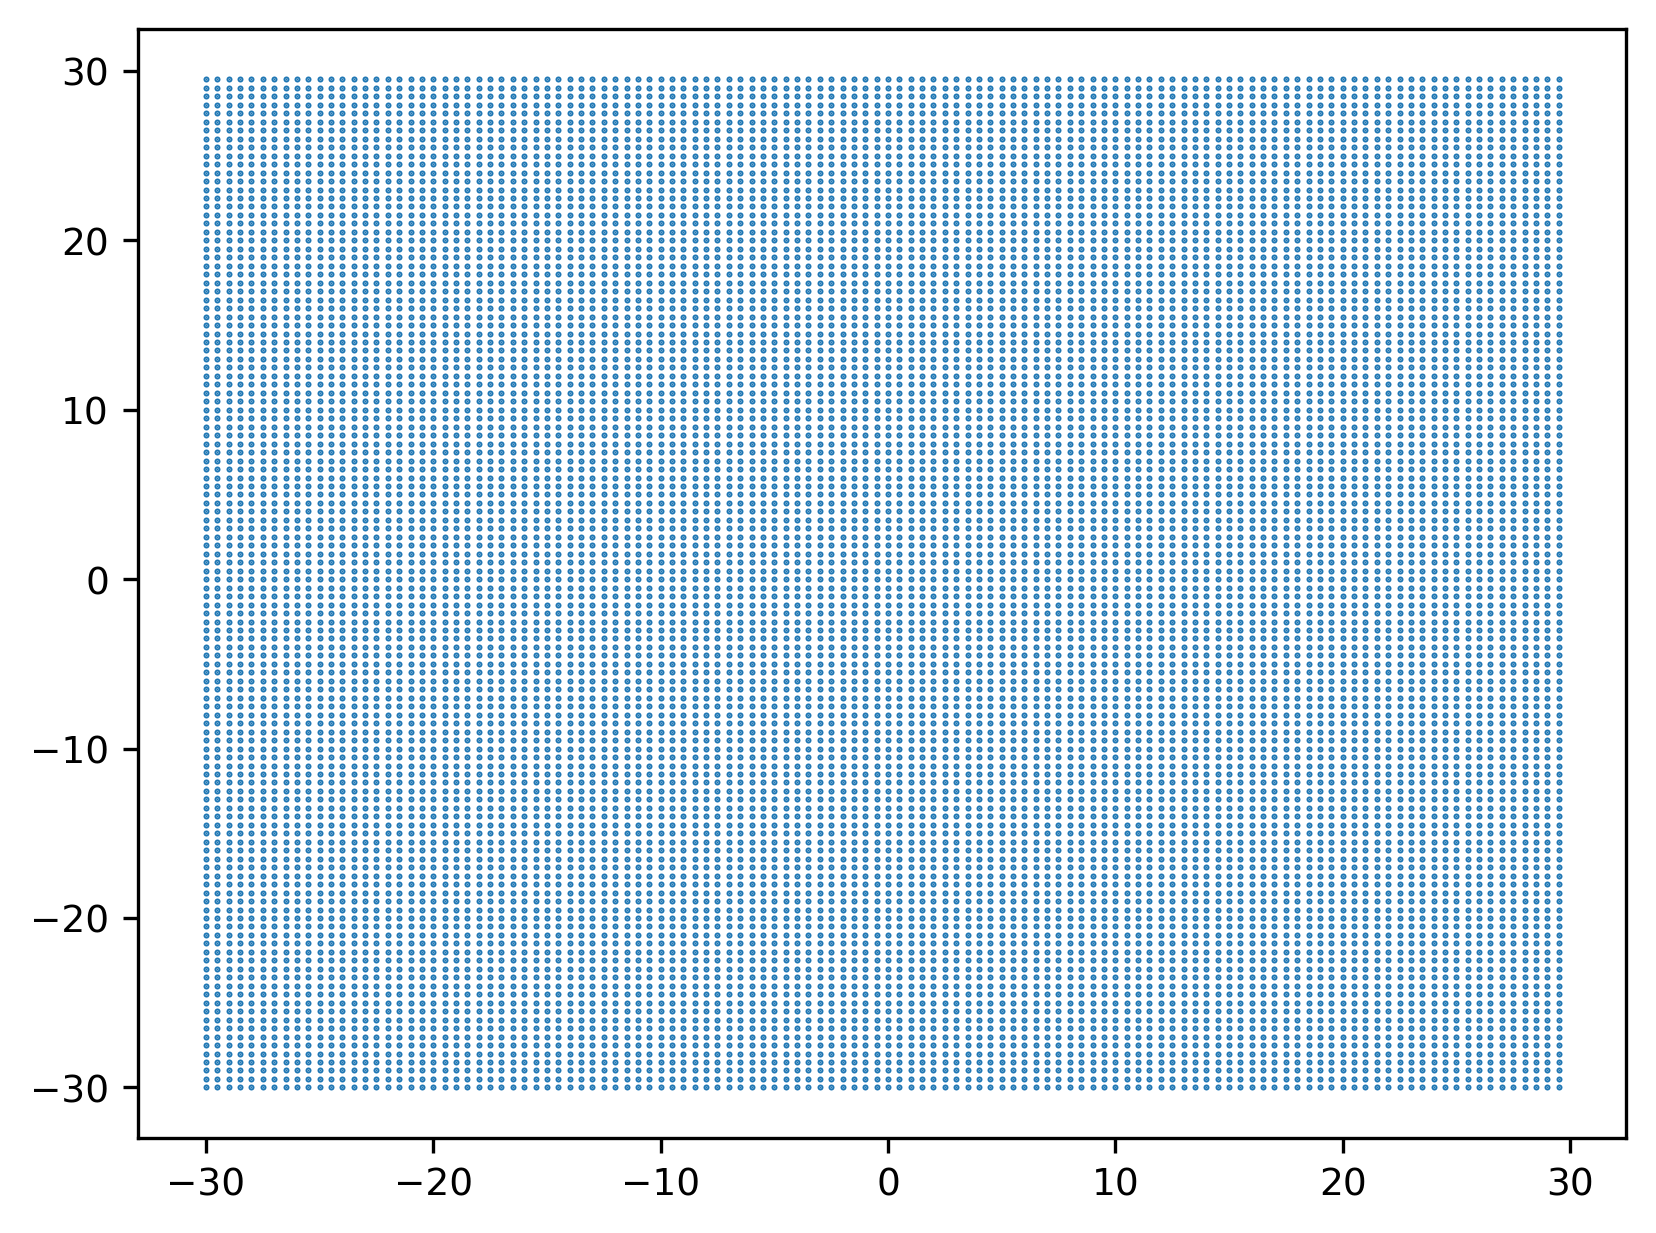

In [37]:
plt.figure(dpi=300)
plt.scatter(p1,p2,s=0.2)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9);

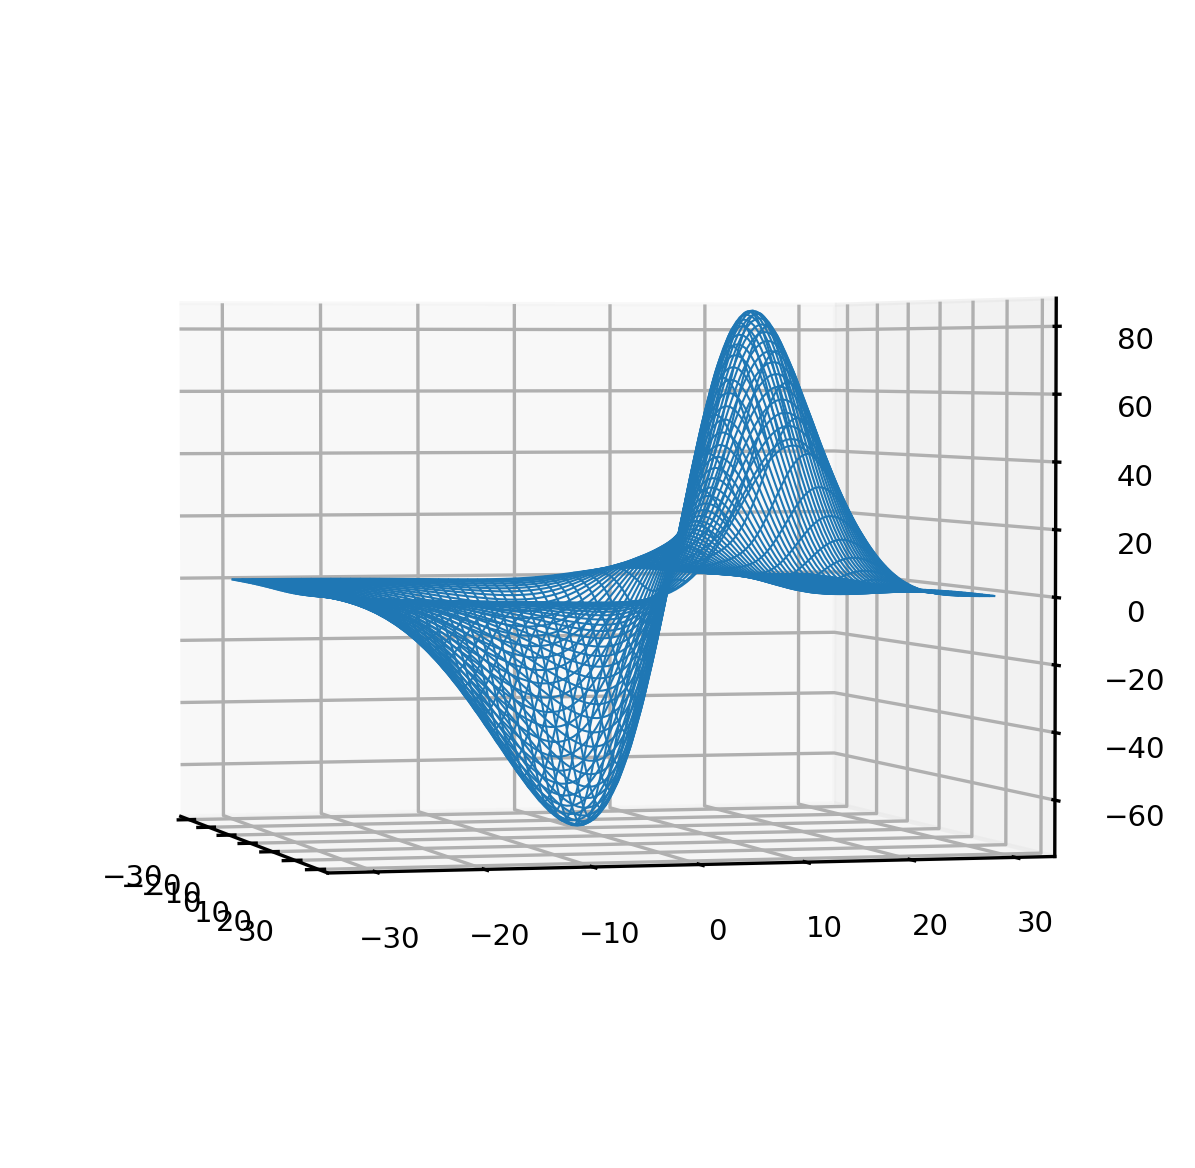

In [38]:
p1, p2, MSE = axes3d.get_test_data(0.05)
plt.figure(dpi=300)
ax = plt.axes(projection="3d")
ax.plot_wireframe(p1,p2,MSE,rstride=2,cstride=2,linewidth=0.5)
ax.view_init(2, -15)
ax.zaxis.set_tick_params(labelsize=7)
ax.xaxis.set_tick_params(labelsize=7)
ax.yaxis.set_tick_params(labelsize=7);

In [39]:
np.min(MSE)

-73.39620971601681

In [40]:
#我们从空间中抽取n个组合，n越大子空间越大
#现在总共有14400个组合
#对被抽中的点来说，损失函数的值就是MSE，对没有抽中的点来说，损失函数值是空值
#因此，我们只需要找出没有抽中的点，并让它的损失函数值MSE为空就可以了

n = 100

-73.23247334291244


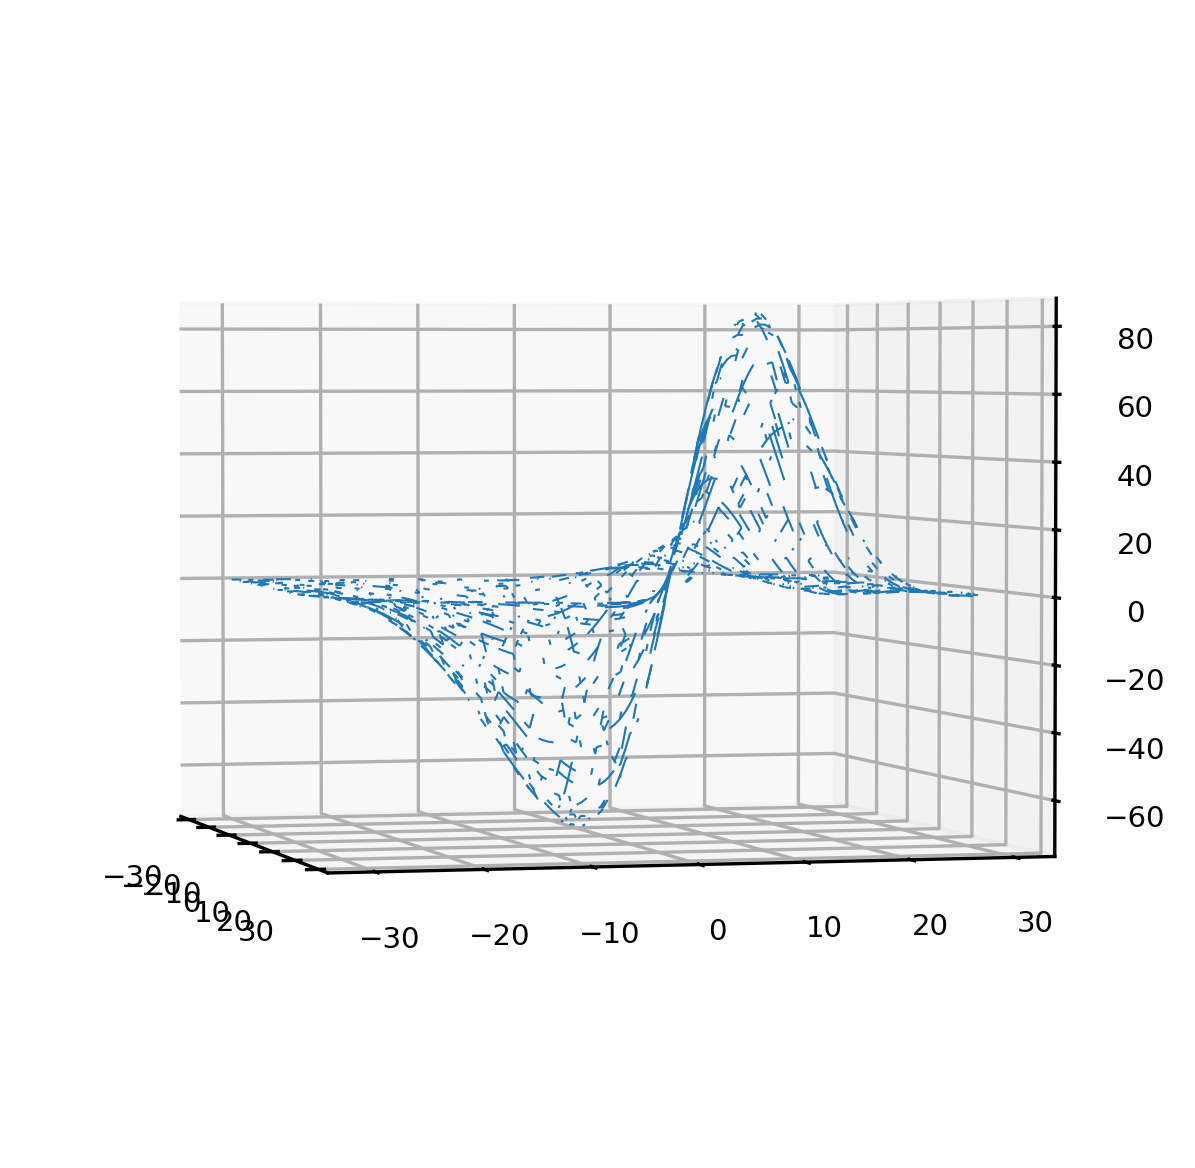

In [41]:
#从0~14400中生成(14400-n)个随机数，形成没有被抽到子空间中的点的索引
unsampled = np.random.randint(0,14400,14400-n)

p1, p2, MSE = axes3d.get_test_data(0.05)

#拉平MSE，并将所有没抽中的点的损失函数变为空值
MSE = MSE.ravel()
MSE[unsampled] = np.nan
MSE = MSE.reshape((120,120))
#设置完毕空值后，记得把MSE恢复成原来的结构，否则绘图报错

#参数与损失共同构建的函数
plt.figure(dpi=300)
ax = plt.axes(projection="3d")
ax.view_init(2, -15)
ax.plot_wireframe(p1,p2,MSE,rstride=2,cstride=2,linewidth=0.5)
ax.zaxis.set_tick_params(labelsize=7)
ax.xaxis.set_tick_params(labelsize=7)
ax.yaxis.set_tick_params(labelsize=7);

#求出当前损失函数上的最小值
#注意此时因为MSE中含有了空值，因此要先排除空值影响，否则min函数会返回空值
MSE = MSE.ravel().tolist()
MSE = [x for x in MSE if str(x) != 'nan']
print(np.min(MSE))

![](https://miro.medium.com/max/1400/0*yDmmJmvRowl0cSN8.png)

---

### HalvingSearchCV

Faced with the problem of too slow enumeration grid search, sklearn presents two optimization methods:**one is to adjust the search space**, and the other is to **adjust the data for each training**. The method to adjust the search space is random grid search, and the method to adjust each training data is half grid search.

Suppose there is a data set $D$, and we randomly sample a subset $d$ from the data set $D$. If a set of parameters performs poorly on the entire data set $D$, there is a high probability that this set of parameters will not perform well on a subset $d$ of the data set. On the contrary, if a set of parameters does not perform well on the subset $d$, we will not trust the performance of this set of parameters on the full data set $D$. **The performance of parameters fed back on the subset and the full data set is consistent**. If this assumption is true, then in grid search, instead of using all the data to verify a set of parameters every time, maybe we can consider Only a subset of the training data is brought in to filter the hyperparameters, which can greatly speed up our operations.

However, in real data, this assumption is conditional, that is, the distribution of any subset is similar to the distribution of the full data set D. When the distribution of the subset is closer to the distribution of the full data set, the performance of the same set of parameters on the subset and the full data set is more likely to be consistent. According to the previous conclusions drawn in random grid search, we know that the larger the subset, the closer its distribution is to the distribution of the full data set, but large subsets will lead to longer training time, so for the overall training efficiency, we It is not possible to increase the subset infinitely. This creates a paradox: results on large subsets are more reliable, but calculations on large subsets are slower. The semi-grid search algorithm has designed an exquisite process, which can well weigh the size of the subset and the computational efficiency:

> 1. First, randomly sample a small subset $d_0$ from the full data set without replacement, and verify the performance of all parameter combinations on $d_0$. According to the verification results on $d_0$, the half of the parameter combinations with the lowest score 1/2 are eliminated<br><br>
> 2. Then, sample a subset $d_1$ that is twice as large as $d_0$ from the full data set without replacement, and verify the performance of the remaining half of the parameter combinations on $d_1$. According to the verification results on $d_1$, the parameter combinations with the lowest 1/2 scores are eliminated<br><br>
> 3. Then sample a subset $d_2$ that is twice as large as $d_1$ from the full data set without replacement, and verify the performance of the remaining 1/4 parameter combinations on $d_2$. According to the verification results on $d_2$, the parameter combinations with the lowest 1/2 score will be eliminated...

**When there is only one set of alternative parameter combinations left, or there is insufficient data available, the loop will stop. Specifically, when $\frac{1}{n}$ C <= 1 or nS > overall sample size, the search will stop**.

- Limitations of half-grid search

However, there will be a problem in this process: the larger the subset, the more similar the distribution of the subset and the full data set D will be. However, at the beginning of the entire half search algorithm, the smallest subset is used to filter out the most Parameter combination. If the distribution of the initial subset is significantly different from that of the full data set, many parameters that are valid for the full data set D may be filtered out in the first few iterations of the half-grid search, so the initial half-grid search The subset must not be too small.

In [42]:
data2 = pd.read_csv(r"D:\Practice\Machine Learning\datasets\House Price\big_train.csv",index_col=0)

In [43]:
X = data2.iloc[:,:-1]
y = data2.iloc[:,-1]

In [44]:
X.shape

(29062, 80)

In [45]:
y.describe()

count     29062.000000
mean     182798.864703
std       72379.404452
min       34900.000000
25%      139000.000000
50%      169092.000000
75%      203009.750000
max      755000.000000
Name: SalePrice, dtype: float64

In [46]:
X.head()

,Id,住宅类型,住宅区域,街道接触面积(英尺),住宅面积,街道路面状况,巷子路面状况,住宅形状(大概),住宅现状,水电气,...,半开放式门廊面积,泳池面积,泳池质量,篱笆质量,其他配置,其他配置的价值,销售月份,销售年份,销售类型,销售状态
0,0.0,5.0,3.0,36.0,327.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,8.0,4.0
1,1.0,0.0,3.0,51.0,498.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,8.0,4.0
2,2.0,5.0,3.0,39.0,702.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2.0,8.0,4.0
3,3.0,6.0,3.0,31.0,489.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0
4,4.0,5.0,3.0,55.0,925.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,8.0,4.0


In [47]:
import re
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import time
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import KFold, HalvingGridSearchCV, cross_validate, RandomizedSearchCV

The class for half grid search is as follows:

*class* `sklearn.model_selection.HalvingGridSearchCV`(estimator, param_grid, *, factor=3, resource='n_samples', max_resources='auto', min_resources='exhaust', aggressive_elimination=False, cv=5, scoring=None , refit=True, error_score=nan, return_train_score=True, random_state=None, n_jobs=None, verbose=0)

All parameters are as follows:

|Name|Description|
|:--:|:--:|
|estimator|parameter adjustment object, an estimator|
|param_grid|Parameter space, which can be a dictionary or a list of dictionaries|
|**factor**|The proportion of the new sample size in each iteration, and also the proportion of parameter combinations left after each iteration|
|**resource**|Set the type of verification resource added in each iteration|
|**max_resources**|The maximum sample size allowed to be used to verify any combination of parameters in an iteration|
|**min_resources**|The sample size r0 used to verify the parameter combination in the first iteration|
|**aggressive_elimination**|Whether the entire number is used is used as an indicator to stop the search, if not, take action|
|cv|Cross-validation fold|
|scoring|Evaluation indicators, supports outputting multiple parameters at the same time|
|refit|Select evaluation metrics and optimal parameters and train on the complete data set|
|error_score|When the grid search reports an error, the result is returned. When 'raise' is selected, the error will be reported directly and the training process will be interrupted<br>In other cases, a warning message will be displayed and the training will continue to be completed|
|return_train_score|Whether to display the parameter score in the training set during cross-validation|
|**random_state**|Control the randomness of randomly sampled data sets|
|n_jobs|Set the number of threads involved in calculation when working|
|verbose|Output work log format|

- **factor**

The proportion of the new sample size in each iteration is also the proportion of parameter combinations left after each iteration. For example, when factor=2, the sample size of the next iteration will be twice that of the previous round, and 1/2 of the parameter combinations will be left after each iteration. If factor=3, the sample size of the next iteration will be three times that of the previous round, and 1/3 of the parameter combinations will be left after each iteration. This parameter usually works better when set to 3.

- **resource**

Set the type of verification resources added in each iteration, input as a string. The default is the sample size, and the input is "n_samples". It can also be a weak classifier that inputs positive integers in any ensemble algorithm, such as "n_estimators" or "n_iteration".

- **min_resource**

The sample size r0 used to verify the parameter combination in the first iteration. You can enter a positive integer, or two strings "smallest" and "exhaust". <br>
Enter a positive integer n, indicating that n samples are used in the first iteration. <br>
Enter "smallest", and r0 will be calculated according to the rules:<br>
> When the resource type is sample size, for regression algorithms, r0 = cross-validation fold number n_splits * 2<br>
> When the resource type is sample size, for the classification algorithm, r0 = number of categories n_classes_ * cross-validation fold number n_splits * 2<br>
> When the resource type is not sample size, equal to 1<br>

Enter "exhaust" to regress r0 based on the maximum available resources in the last round of iteration. For example, when factor=2, the sample size is 1000, and there are 3 iterations in total, the maximum available resources in the last round of iterations are 1000, the second to last round is 500, and the third to last round (first round) is 250. At this time r0 = 250. "Exhaust" mode is most likely to get good results, but the calculation amount will be slightly larger and the calculation time will be slightly longer.

In [48]:
#290k sapmles with factor=2, min_resource = 100
for i in range(100):
    if 100*2**i > 29062:
        break
    print(i+1,100*2**i)

1 100
2 200
3 400
4 800
5 1600
6 3200
7 6400
8 12800
9 25600


In [49]:
#1536 combinations with factor= 2
for i in range(100):
    if 1536//2**i < 1:
        break
    print(i+1,int(1536//2**i+1)) #向上取整

1 1537
2 769
3 385
4 193
5 97
6 49
7 25
8 13
9 7
10 4
11 2


- **aggressive_elimination**

Enter a Boolean value, default False. This parameter can be turned on when the total sample size of the data is too small to support the cycle until only the last set of alternative parameters is left.
> When the parameter is set to True, the sample size in the first iteration will be reused until the remaining data is enough to support the increase in sample size until only the last set of alternative parameters is left<br>
> When the parameter is set to False, all samples are used up as the indicator that the search ends<br>

If we want all combinations in the parameter space to be fully verified, the number of iterations cannot be too few (for example, only 3 iterations), so the factor cannot be too large. But if the factor is too small, the number of iterations will be increased and the running time of the entire search will be lengthened. At the same time, the number of iterations will also affect the amount of data we can finally use, as well as the number of parameter combinations we need to further verify after the iterations are completed, neither of which can be too small. Therefore, when we generally use half grid search, we need to consider the following three points:

1. The value of min_resources cannot be too small, and we hope to use as much data as possible before the end of the entire iteration process<br>
2. After the iteration is completed, there should not be too many remaining verification parameter combinations. Below 10 is the best. If it cannot be achieved, below 30 is also acceptable<br>
3. The number of iterations cannot be too many, otherwise it may take too long

In [50]:
factor = 1.5
n_samples = X.shape[0]
min_resources = 500
space = 1536

for i in range(100):
    if (min_resources*factor**i > n_samples) or (space/factor**i < 1):
        break
    print(i+1,"sample in current iteration:{}".format(min_resources*factor**i)
          ,"params in current iteration:{}".format(space//factor**i + 1))

1 sample in current iteration:500.0 params in current iteration:1537.0
2 sample in current iteration:750.0 params in current iteration:1025.0
3 sample in current iteration:1125.0 params in current iteration:683.0
4 sample in current iteration:1687.5 params in current iteration:456.0
5 sample in current iteration:2531.25 params in current iteration:304.0
6 sample in current iteration:3796.875 params in current iteration:203.0
7 sample in current iteration:5695.3125 params in current iteration:135.0
8 sample in current iteration:8542.96875 params in current iteration:90.0
9 sample in current iteration:12814.453125 params in current iteration:60.0
10 sample in current iteration:19221.6796875 params in current iteration:40.0
11 sample in current iteration:28832.51953125 params in current iteration:27.0


In [51]:
reg = RFR(random_state=1412,verbose=True,n_jobs=-1)
cv = KFold(n_splits=5,shuffle=True,random_state=21)
search = HalvingGridSearchCV(estimator=reg
                            ,param_grid=param_grid_simple
                            ,factor=1.5
                            ,min_resources=500
                            ,scoring = "neg_mean_squared_error"
                            ,verbose = True
                            ,random_state=1412
                            ,cv = cv
                            ,n_jobs=-1)

In [52]:
start = time.time()
search.fit(X,y)
end = time.time() - start
print(end/60)

n_iterations: 11
n_required_iterations: 19
n_possible_iterations: 11
min_resources_: 500
max_resources_: 29062
aggressive_elimination: False
factor: 1.5
----------
iter: 0
n_candidates: 1536
n_resources: 500
Fitting 5 folds for each of 1536 candidates, totalling 7680 fits


d:\CODE\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1280 fits failed out of a total of 7680.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
914 fits failed with the following error:
Traceback (most recent call last):
  File "d:\CODE\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\CODE\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "d:\CODE\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "d:\CODE\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints


----------
iter: 1
n_candidates: 1024
n_resources: 750
Fitting 5 folds for each of 1024 candidates, totalling 5120 fits


d:\CODE\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [-1.16553438e+09 -1.21699054e+09 -1.19113005e+09 ... -8.86131062e+08
 -8.87774404e+08 -8.79894346e+08]
  warnings.warn(
d:\CODE\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the train scores are non-finite: [-1.31081468e+08 -1.20370727e+08 -1.10633685e+08 ... -7.08558397e+07
 -7.01644315e+07 -7.07289361e+07]
  warnings.warn(


----------
iter: 2
n_candidates: 683
n_resources: 1125
Fitting 5 folds for each of 683 candidates, totalling 3415 fits


d:\CODE\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [-1.16553438e+09 -1.21699054e+09 -1.19113005e+09 ... -5.41373624e+08
 -5.34683985e+08 -5.09530453e+08]
  warnings.warn(
d:\CODE\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the train scores are non-finite: [-1.31081468e+08 -1.20370727e+08 -1.10633685e+08 ... -6.93872470e+07
 -6.92041804e+07 -6.51636903e+07]
  warnings.warn(


----------
iter: 3
n_candidates: 456
n_resources: 1687
Fitting 5 folds for each of 456 candidates, totalling 2280 fits


d:\CODE\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [-1.16553438e+09 -1.21699054e+09 -1.19113005e+09 ... -4.23872141e+08
 -4.26463799e+08 -4.16155912e+08]
  warnings.warn(
d:\CODE\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the train scores are non-finite: [-1.31081468e+08 -1.20370727e+08 -1.10633685e+08 ... -4.96060274e+07
 -5.07582095e+07 -5.08614096e+07]
  warnings.warn(


----------
iter: 4
n_candidates: 304
n_resources: 2531
Fitting 5 folds for each of 304 candidates, totalling 1520 fits


d:\CODE\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [-1.16553438e+09 -1.21699054e+09 -1.19113005e+09 ... -4.09197211e+08
 -4.08440049e+08 -4.09769261e+08]
  warnings.warn(
d:\CODE\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the train scores are non-finite: [-1.31081468e+08 -1.20370727e+08 -1.10633685e+08 ... -4.48031684e+07
 -4.49874665e+07 -4.14655793e+07]
  warnings.warn(


----------
iter: 5
n_candidates: 203
n_resources: 3796
Fitting 5 folds for each of 203 candidates, totalling 1015 fits


d:\CODE\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [-1.16553438e+09 -1.21699054e+09 -1.19113005e+09 ... -2.77615262e+08
 -2.77897328e+08 -2.78287382e+08]
  warnings.warn(
d:\CODE\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the train scores are non-finite: [-1.31081468e+08 -1.20370727e+08 -1.10633685e+08 ... -2.94039928e+07
 -2.78906356e+07 -2.78203870e+07]
  warnings.warn(


----------
iter: 6
n_candidates: 136
n_resources: 5695
Fitting 5 folds for each of 136 candidates, totalling 680 fits


d:\CODE\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [-1.16553438e+09 -1.21699054e+09 -1.19113005e+09 ... -1.53863700e+08
 -1.59503640e+08 -1.53058229e+08]
  warnings.warn(
d:\CODE\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the train scores are non-finite: [-1.31081468e+08 -1.20370727e+08 -1.10633685e+08 ... -1.77909809e+07
 -1.95769411e+07 -1.81718755e+07]
  warnings.warn(


----------
iter: 7
n_candidates: 91
n_resources: 8542
Fitting 5 folds for each of 91 candidates, totalling 455 fits


d:\CODE\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [-1.16553438e+09 -1.21699054e+09 -1.19113005e+09 ... -6.83503436e+07
 -6.73609541e+07 -6.75115582e+07]
  warnings.warn(
d:\CODE\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the train scores are non-finite: [-1.31081468e+08 -1.20370727e+08 -1.10633685e+08 ... -9.57368534e+06
 -9.12223200e+06 -9.02937366e+06]
  warnings.warn(


----------
iter: 8
n_candidates: 61
n_resources: 12814
Fitting 5 folds for each of 61 candidates, totalling 305 fits


d:\CODE\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [-1.16553438e+09 -1.21699054e+09 -1.19113005e+09 ... -2.20367079e+07
 -2.17684310e+07 -2.19500770e+07]
  warnings.warn(
d:\CODE\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the train scores are non-finite: [-1.31081468e+08 -1.20370727e+08 -1.10633685e+08 ... -3.19743424e+06
 -3.08978123e+06 -3.14579216e+06]
  warnings.warn(


----------
iter: 9
n_candidates: 41
n_resources: 19221
Fitting 5 folds for each of 41 candidates, totalling 205 fits


d:\CODE\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [-1.16553438e+09 -1.21699054e+09 -1.19113005e+09 ... -3.82134066e+06
 -3.90852433e+06 -3.80088981e+06]
  warnings.warn(
d:\CODE\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the train scores are non-finite: [-1.31081468e+08 -1.20370727e+08 -1.10633685e+08 ... -7.91252876e+05
 -8.28200252e+05 -7.69255221e+05]
  warnings.warn(


----------
iter: 10
n_candidates: 28
n_resources: 28832
Fitting 5 folds for each of 28 candidates, totalling 140 fits


d:\CODE\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [-1.16553438e+09 -1.21699054e+09 -1.19113005e+09 ... -1.12603955e+06
 -1.15397048e+06 -1.14829775e+06]
  warnings.warn(
d:\CODE\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the train scores are non-finite: [-1.31081468e+08 -1.20370727e+08 -1.10633685e+08 ... -2.18958602e+05
 -2.34065331e+05 -2.27810365e+05]
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.7s


105.90618897676468


[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    5.4s finished


In [53]:
search.best_estimator_

RandomForestRegressor(criterion='poisson', max_depth=24, max_features=16,
                      min_impurity_decrease=0, n_estimators=95, n_jobs=-1,
                      random_state=1412, verbose=True)

In [54]:
abs(search.best_score_)**0.5

1049.7687231372342

In [55]:
rebuild_on_best_param(search.best_estimator_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.1s finished


Train_RMSE:450.506
TestRMSE:1033.176


---

- Implemented automation framework
> - Automated data preprocessing framework: [MLBoX](https://github.com/AxeldeRomblay/MLBox)
> - Automated model selection framework: [H20 AutoML](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html)
> - Automated hyperparameter optimization framework: [Bayesian Optimization](https://github.com/fmfn/BayesianOptimization), [Hyperopt](https://github.com/hyperopt/hyperopt), [DEAP](https:/ /github.com/DEAP/deap), [Optuna](https://github.com/optuna/optuna)
> - Automated stacking integration: [AutoGluon](https://auto.gluon.ai/stable/index.html)
> - Automated pipeline structure optimization (based on genetic algorithm): [TPOT](http://epistasislab.github.io/tpot/)
> - Automated neural network architecture construction: [Auto-PyTorch](https://github.com/automl/Auto-PyTorch), [AutoKeras](https://autokeras.com/)
> - Comprehensive automated modeling: [AutoWEKA](http://www.cs.ubc.ca/labs/beta/Projects/autoweka/), [Auto-sklearn](https://automl.github.io/ auto-sklearn/master/), [hpsklearn](https://hyperopt.github.io/hyperopt-sklearn/)

### Three mature research areas of AutoML

- **HyperParameter Optimization HPO** 

> Various types of searches based on grid (Grid)<br>
> Various optimization algorithms based on Bayesian optimization (Baysian)<br>
> Various types of optimization based on gradient (Gradient-based)<br>
> Various types of optimization based on evolutionary algorithms (Evolutionary Optimzation)

- **Neural Architecture Search NAS**

- **Meta-Learning**